In [1]:
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook as tqdm
from scipy.fftpack import dct, idct
import seaborn as sns
# sns.set(style="dark")
%matplotlib inline

In [2]:
class ImageLoader:
    def __init__(self,FILE_PATH):
            self.img = np.array(Image.open(FILE_PATH))
            
    def get_points(self,POINT):
        Row = random.randint(0,len(self.img)-POINT-1)
        Col = random.randint(0,len(self.img)-1)
        return self.img[Row:Row+POINT,Col]

In [3]:
def get_data_simple_connect(data):
    return np.hstack((data,data))

In [4]:
def get_data_even_connect(data):
    return np.hstack((data,data[::-1]))

In [5]:
def get_data_odd_connect(data):
    return np.hstack((data,data[::-1]*(-1)))

In [6]:
# ランチョスしたのを返す
def Lanczos(data):
    points = len(data)
    left = int(data[0])
    right = int(data[len(data)-1])
    result = np.zeros(points)

    for i in range(points):
#         result[i] = data[i] - ((right-left)*i/(points-1) + left)
        result[i] = data[i] - ((right-left)*i/(points-1))
    
    return result

## 基底関数
$$
\phi_k[i] = \begin{cases}
\cfrac{1}{\sqrt{N}}  \quad \quad \quad (k=0) \\
\sqrt{\cfrac{2}{N}} \cos \left({\cfrac{\pi}{2N}(2i+1)k}\right) \quad  (k=1,2,...,N-1) 
\end{cases}
$$

In [7]:
class DCT:
    def __init__(self,N):
        self.N = N # データ数
        # 1次元DCTの基底ベクトルの生成
        self.phi_1d = np.array([ self.phi(i) for i in range(self.N)])
        # 2次元DCTの基底ベクトルの格納
        self.phi_2d = np.zeros((N,N))
                
    def phi(self,k):
        """ 離散コサイン変換(DCT)の基底関数 """
        # DCT-II
        if k == 0:
            return np.ones(self.N)/np.sqrt(self.N)
        else:
            return np.sqrt(2.0/self.N)*np.cos((k*np.pi/(2*self.N))*(np.arange(self.N)*2+1))
        
    def dct(self,data):
        """ 1次元離散コサイン変換を行う """
        return self.phi_1d.dot(data)

    def idct(self,c):
        """ 1次元離散コサイン逆変換を行う """
        return np.sum( self.phi_1d.T * c,axis=1)
    
    def get_dct2_phi(self,i,j):
        """ 2次元離散コサイン変換の基底を返す """
        phi_i,phi_j = np.meshgrid(self.phi_1d[i],self.phi_1d[j])
        return phi_i*phi_j
    
    def get_dct2(self,i,j,data):
        """ i,jの2次元DCT係数を返す """
        phi_2d_phi = np.zeros((self.N,self.N))
        phi_2d_phi = self.get_dct2_phi(i,j)
        return np.sum(phi_2d_phi.reshape(self.N*self.N)*data.reshape(self.N*self.N))
    
    def dct2(self,data):
        """ 2次元離散コサイン変換を行う """
        for j in tqdm(range(self.N)):
            for i in range(self.N):
                self.phi_2d[i,j] = self.get_dct2(i,j,data)
        
        return self.phi_2d
    
    def idct2(self,c):
        """ 2次元離散コサイン逆変換を行う """
        idct2_data = np.zeros((self.N,self.N))
        phi_2d_phi = np.zeros((self.N,self.N))
        for i in tqdm(range(self.N)):
            for j in range(self.N):
                phi_2d_phi = self.get_dct2_phi(j,i)
                idct2_data += c.reshape((self.N,self.N,1))[j,i]*phi_2d_phi
        
        return idct2_data

In [8]:
# plt.rcParams['font.family'] ='sans-serif'#使用するフォント
# plt.rcParams["font.sans-serif"] = "Source Han Sans"
plt.rcParams['font.family'] ='Source Han Sans JP' #使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 12 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
matplotlib.font_manager._rebuild()

# 画像の用意

In [9]:
AIRPLANE   = ImageLoader("Mono/Airplane.bmp")
BARBARA    = ImageLoader("Mono/BARBARA.bmp")
BOAT       = ImageLoader("Mono/BOAT.bmp")
BRIDGE     = ImageLoader("Mono/BRIDGE.bmp")
BUILDING   = ImageLoader("Mono/Building.bmp")
CAMERAMAN  = ImageLoader("Mono/Cameraman.bmp")
GIRL       = ImageLoader("Mono/girl.bmp")
LAX        = ImageLoader("Mono/LAX.bmp")
LENNA      = ImageLoader("Mono/LENNA.bmp")
LIGHTHOUSE = ImageLoader("Mono/Lighthouse.bmp")
SIDBAtitle = ImageLoader("Mono/SIDBAtitle256.bmp")
TEXT       = ImageLoader("Mono/Text.bmp")
WOMAN      = ImageLoader("Mono/WOMAN.bmp")

In [10]:
Images = np.array(
    [
        AIRPLANE,BARBARA,BOAT,
        BRIDGE,BUILDING,CAMERAMAN,
        GIRL,LAX,LENNA,
        LIGHTHOUSE,SIDBAtitle,TEXT,
        WOMAN
    ]
)

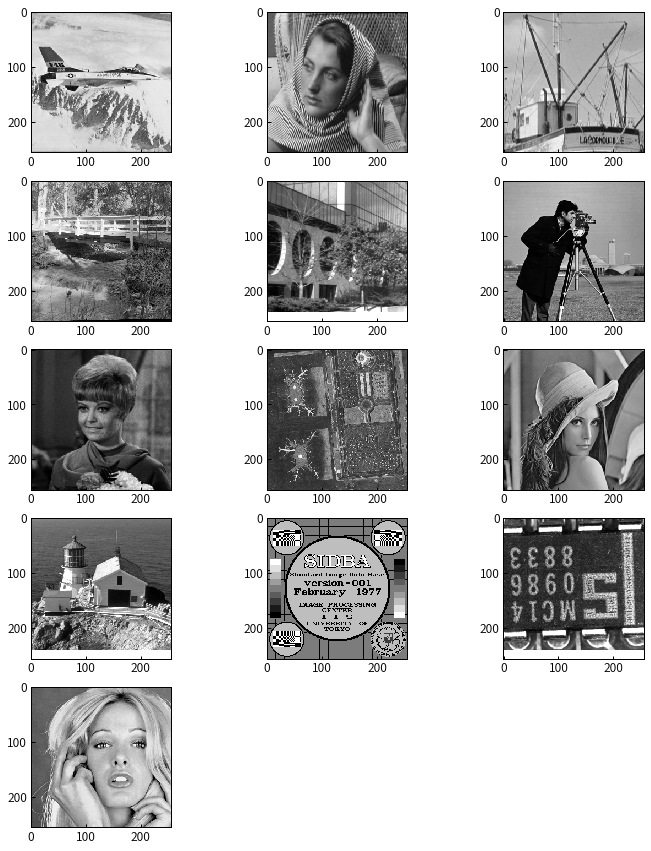

In [11]:
fig = plt.figure(figsize=(12,15))
for i in range(len(Images)):
    plt.subplot(len(Images)//3 + 1, 3 ,i+1)
    plt.imshow(Images[i].img,"gray")

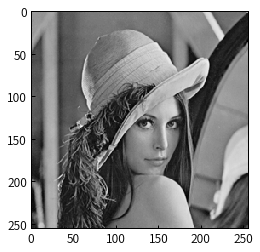

In [12]:
plt.imshow(Images[8].img,"gray")

plt.savefig('output/output_22.png',dpi=300)

# エネルギー

エネルギーはDCT後も保存され、信号列の2乗和とDCT係数の2乗和は等しくなる。

また、DCTにより、エネルギーは先頭(?)に集まることが見てわかる。

https://www.jstage.jst.go.jp/article/bplus/12/4/12_284/_pdf

ただし、信号にランチョス法を適用したものと、信号列のエネルギーは一致しない。

## 信号のエネルギーとDCT係数のエネルギー

### 信号列

In [13]:
data = LENNA.get_points(8).astype(np.uint64)
data

array([199, 201, 200, 197, 186, 192, 198, 194], dtype=uint64)

### 信号列のエネルギー

In [14]:
# 二乗和
power = sum(np.power(data,2))
power

307111.0

### 信号列のDCT係数のエネルギー

In [15]:
dct = DCT(8)
c = dct.dct(data)
c

array([554.01816306,   6.99444532,   5.95878968,  -5.19273886,
        -5.30330086,   5.27119182,  -1.3201612 ,  -2.41407014])

In [16]:
power = sum(np.power(c,2))
power

307110.9999999999

### ランチョス法を適用した信号列のエネルギー

In [17]:
lanczos = Lanczos(data)
lanczos

array([199.        , 201.71428571, 201.42857143, 199.14285714,
       188.85714286, 195.57142857, 202.28571429, 199.        ])

In [18]:
power = sum(np.power(lanczos,2))
power

314956.7142857143

### ランチョス法を適用した信号列のDCT係数のエネルギー

In [19]:
dct = DCT(8)
c = dct.dct(lanczos)
c

array([561.08923087,   2.39278602,   5.95878968,  -5.673778  ,
        -5.30330086,   5.12768974,  -1.3201612 ,  -2.45028608])

In [20]:
power = sum(np.power(c,2))
power

314956.7142857142

# FFTとDCTの比較

DCTはDFTに比べて、エネルギーが低周波に集まることで知られている

https://ja.wikipedia.org/wiki/%E9%9B%A2%E6%95%A3%E3%82%B3%E3%82%B5%E3%82%A4%E3%83%B3%E5%A4%89%E6%8F%9B に書かれている

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Dandelion_clock_quarter_dft_dct.png/350px-Dandelion_clock_quarter_dft_dct.png)

それを確かめようと思う

図は右側が空間スペクトル、右がヒストグラムである

DCT係数はほとんどの値が小さいことがわかる

## 2次元DCT FFTを図示する

直流成分が大きすぎる(colorbarの色の変化が見れなかった)ので0埋めしておく

パワースペクトルは$20 \log_{10} V$だけど、値を正規化するので$\log_{10} V$で計算する

$\log_{10}$した後の値でマイナス値になる(1以下の数字)のは0だとする。(電圧値でいえば、$\simeq$ 0なので)

そうして、0~1の値にする

https://yaritakunai.hatenablog.com/entry/2016/03/20/235500

In [21]:
dct = DCT(256)
dct_F = dct.dct2(LENNA.img)

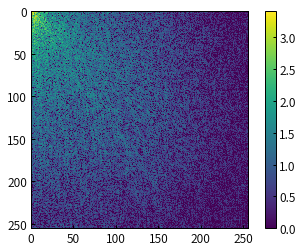

In [27]:
# dct_F1 = np.zeros((256,256))
dct_F1 = np.abs(dct_F)
dct_F1 = np.log10(dct_F1)
dct_F1[0,0] = 0
dct_F1[dct_F1 < 0] = 0
plt.imshow(dct_F1)
# plt.imshow(np.log10(np.abs(dct_F)))
plt.colorbar()

plt.savefig('output/output_22.png',dpi=300)

In [28]:
fft_F = np.fft.fft2(LENNA.img)

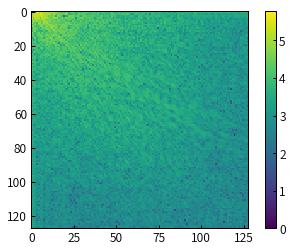

In [29]:
fft_F1 = np.abs(fft_F)
fft_F1 = np.log10(fft_F1)
fft_F1[0,0] = 0
fft_F1[0,255] = 0
fft_F1[255,0] = 0
fft_F1[255,255] = 0
# 第2象限のみ表示
plt.imshow(fft_F1[:128,:128])
plt.colorbar()
plt.savefig('output/output_23.png',dpi=300)

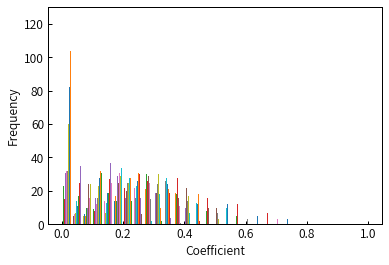

In [30]:
plt.hist(dct_F1/dct_F1.max(),bins=30)
# plt.title("DCT係数 ヒストグラム")
plt.xlabel("Coefficient")
plt.ylabel("Frequency")
plt.savefig('output/output_24.png',dpi=300)

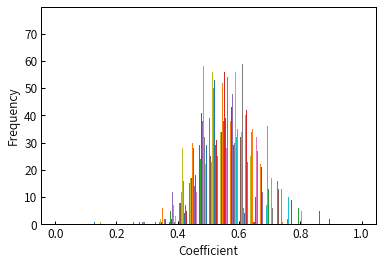

In [31]:
plt.hist(fft_F1/fft_F1.max(),bins=30)
# plt.title("FFT スペクトル ヒストグラム")
plt.xlabel("Coefficient")
plt.ylabel("Frequency")
plt.savefig('output/output_25.png',dpi=300)

それっぽい分布になった

# エネルギーの収束性

DCT DCT+ランチョス FFT FFT+ランチョス それぞれを計算し、エネルギーの集中具合を比較する

## AIRPLANE

### DCT DCT+L

In [22]:
# 直流1個 交流7個
N = 8
dct = DCT(N)
LOOP_COUNT = 10000
AIRPLANE_F_DCT   = np.zeros(N)
AIRPLANE_F_DCT_L = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = AIRPLANE.get_points(N)
    data_L = Lanczos(data)
    
    AIRPLANE_F_DCT   += abs(dct.dct(data))
    AIRPLANE_F_DCT_L += abs(dct.dct(data_L))
    
AIRPLANE_F_DCT   /= LOOP_COUNT
AIRPLANE_F_DCT_L /= LOOP_COUNT

### FFT FFT+L

In [23]:
# 直流1個 交流7x2=14個(ちょうど7個目で折り返した形)
N = 15
LOOP_COUNT = 10000
AIRPLANE_F_FFT   = np.zeros(N)
AIRPLANE_F_FFT_L = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = AIRPLANE.get_points(N)
    data_L = Lanczos(data)
    AIRPLANE_F_FFT   += abs(np.fft.fft(data))
    AIRPLANE_F_FFT_L += abs(np.fft.fft(data_L))
    
AIRPLANE_F_FFT   /= LOOP_COUNT
AIRPLANE_F_FFT_L /= LOOP_COUNT

### 比較

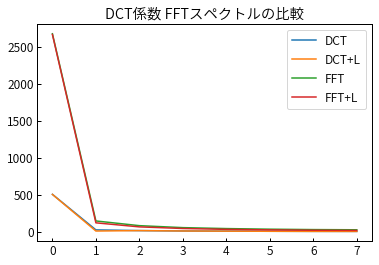

In [24]:
plt.plot(AIRPLANE_F_DCT      ,label="DCT")
plt.plot(AIRPLANE_F_DCT_L    ,label="DCT+L")
plt.plot(AIRPLANE_F_FFT[:8]  ,label="FFT")
plt.plot(AIRPLANE_F_FFT_L[:8],label="FFT+L")

plt.title("DCT係数 FFTスペクトルの比較")
plt.legend()

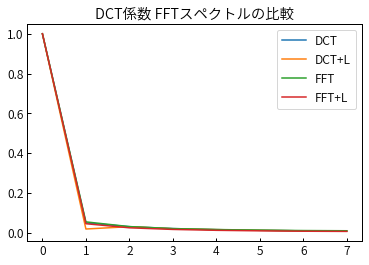

In [25]:
# 大きさを揃えてプロットする
# 最大値で割って大きさを揃える
plt.plot(AIRPLANE_F_DCT/AIRPLANE_F_DCT.max() ,label="DCT")
plt.plot(AIRPLANE_F_DCT_L/AIRPLANE_F_DCT_L.max() ,label="DCT+L")
plt.plot(AIRPLANE_F_FFT[:8]/AIRPLANE_F_FFT[:8].max() ,label="FFT")
plt.plot(AIRPLANE_F_FFT_L[:8]/AIRPLANE_F_FFT_L[:8].max() ,label="FFT+L")

plt.title("DCT係数 FFTスペクトルの比較")
plt.legend()

違いがよくわからない

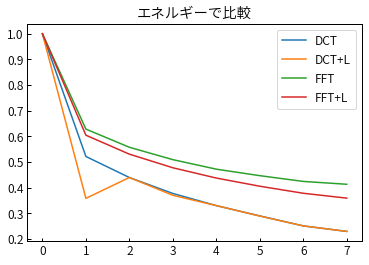

In [21]:
AIRPLANE_F_DCT_power   = np.log10(AIRPLANE_F_DCT)
AIRPLANE_F_DCT_L_power = np.log10(AIRPLANE_F_DCT_L)
AIRPLANE_F_FFT_power   = np.log10(AIRPLANE_F_FFT)
AIRPLANE_F_FFT_L_power = np.log10(AIRPLANE_F_FFT_L)

# 最大値で割って大きさを揃える
AIRPLANE_F_DCT_power       /= AIRPLANE_F_DCT_power.max()
AIRPLANE_F_DCT_L_power     /= AIRPLANE_F_DCT_L_power.max()
# FFTスペクトルは折り返しになる前まで
AIRPLANE_F_FFT_power[:8]   /= AIRPLANE_F_FFT_power[:8].max()
AIRPLANE_F_FFT_L_power[:8] /= AIRPLANE_F_FFT_L_power[:8].max()

plt.plot(AIRPLANE_F_DCT_power      ,label="DCT")
plt.plot(AIRPLANE_F_DCT_L_power    ,label="DCT+L")
plt.plot(AIRPLANE_F_FFT_power[:8]  ,label="FFT")
plt.plot(AIRPLANE_F_FFT_L_power[:8],label="FFT+L")
plt.title("エネルギーで比較")
plt.legend()

DCT+ランチョスが一番低周波にエネルギーが集まる結果になった

### 考察

DCTとDCT+Lで大きく差が見られるのは横軸の1(index)の値だけ？

FFTとFFT+Lのように全体的にDCT+Lの方が値が小さくなるわけではない？

#### DCTとDCT+Lの交流成分だけ取り出して比較してみる

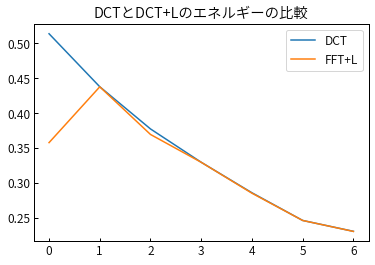

In [15]:
plt.plot(AIRPLANE_F_DCT_power[1:]  ,label="DCT")
plt.plot(AIRPLANE_F_DCT_L_power[1:],label="FFT+L")
plt.title("DCTとDCT+Lのエネルギーの比較")
plt.legend()

#### DCTとDCT+Lの係数を比較

In [16]:
print(AIRPLANE_F_DCT)
print(AIRPLANE_F_DCT_L)

[505.71619381  24.47201026  15.26564189  10.4870825    7.79401378
   5.9406003    4.64348707   4.21509689]
[506.20841084   9.28636982  15.26564189   9.98704112   7.79401378
   5.91960807   4.64348707   4.21262333]


1個飛ばし(規則性あり)で同じ値が出てくるのは何故？

ランチョス法により信号の形が変わっているけど、同じ値が出てくる...。

信号に含まれる周波数成分には変化がない？

## LENNA

### DCT DCT+L

In [62]:
N = 8
dct = DCT(N)
LOOP_COUNT = 10000
LENNA_F_DCT   = np.zeros(N)
LENNA_F_DCT_L = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = LENNA.get_points(N)
    data_L = Lanczos(data)
    
    LENNA_F_DCT   += abs(dct.dct(data))
    LENNA_F_DCT_L += abs(dct.dct(data_L))
    
LENNA_F_DCT   /= LOOP_COUNT
LENNA_F_DCT_L /= LOOP_COUNT

### FFT FFT+L

In [63]:
N = 15
LOOP_COUNT = 10000
LENNA_F_FFT   = np.zeros(N)
LENNA_F_FFT_L = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = LENNA.get_points(N)
    data_L = Lanczos(data)
    LENNA_F_FFT   += abs(np.fft.fft(data))
    LENNA_F_FFT_L += abs(np.fft.fft(data_L))
    
LENNA_F_FFT   /= LOOP_COUNT
LENNA_F_FFT_L /= LOOP_COUNT

### 比較

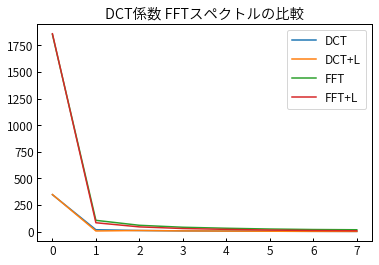

In [64]:
plt.plot(LENNA_F_DCT      ,label="DCT")
plt.plot(LENNA_F_DCT_L    ,label="DCT+L")
plt.plot(LENNA_F_FFT[:8]  ,label="FFT")
plt.plot(LENNA_F_FFT_L[:8],label="FFT+L")

plt.title("DCT係数 FFTスペクトルの比較")
plt.legend()

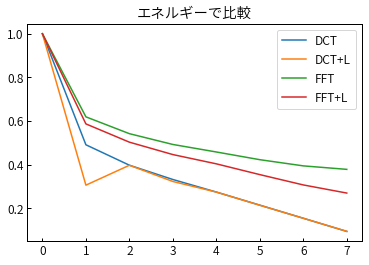

In [65]:
LENNA_F_DCT_power   = np.log10(LENNA_F_DCT)
LENNA_F_DCT_L_power = np.log10(LENNA_F_DCT_L)
LENNA_F_FFT_power   = np.log10(LENNA_F_FFT)
LENNA_F_FFT_L_power = np.log10(LENNA_F_FFT_L)

LENNA_F_DCT_power       /= LENNA_F_DCT_power.max()
LENNA_F_DCT_L_power     /= LENNA_F_DCT_L_power.max()
LENNA_F_FFT_power[:8]   /= LENNA_F_FFT_power[:8].max()
LENNA_F_FFT_L_power[:8] /= LENNA_F_FFT_L_power[:8].max()

plt.plot(LENNA_F_DCT_power      ,label="DCT")
plt.plot(LENNA_F_DCT_L_power    ,label="DCT+L")
plt.plot(LENNA_F_FFT_power[:8]  ,label="FFT")
plt.plot(LENNA_F_FFT_L_power[:8],label="FFT+L")
plt.title("エネルギーで比較")
plt.legend()

AIRPLANEの画像のときと大体同じようなグラフが得られた

### 偶接続してFFT、DCT

### LENNA

In [32]:
N = 16
dct = DCT(N)
LOOP_COUNT = 10000
LENNA_F_DCT   = np.zeros(N)
LENNA_F_DCT_L = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = LENNA.get_points(N//2)
    data_L = Lanczos(data)
    
    data_even = get_data_even_connect(data)
    data_L_even = get_data_even_connect(data_L)
    
    LENNA_F_DCT   += abs(dct.dct(data_even))
    LENNA_F_DCT_L += abs(dct.dct(data_L_even))
    
LENNA_F_DCT   /= LOOP_COUNT
LENNA_F_DCT_L /= LOOP_COUNT

In [33]:
N = 32
LOOP_COUNT = 10000
LENNA_F_FFT   = np.zeros(N)
LENNA_F_FFT_L = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = LENNA.get_points(N//2)
    data_L = Lanczos(data)
    
    data_even = get_data_even_connect(data)
    data_L_even = get_data_even_connect(data_L)
    
    LENNA_F_FFT   += abs(np.fft.fft(data_even))
    LENNA_F_FFT_L += abs(np.fft.fft(data_L_even))
    
LENNA_F_FFT   /= LOOP_COUNT
LENNA_F_FFT_L /= LOOP_COUNT

/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


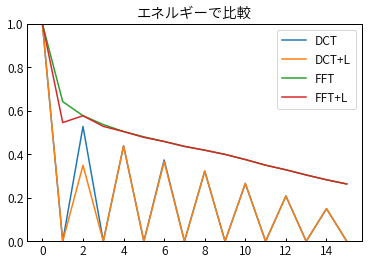

In [34]:
LENNA_F_DCT_power   = np.log10(LENNA_F_DCT)
LENNA_F_DCT_L_power = np.log10(LENNA_F_DCT_L)

LENNA_F_DCT_power[LENNA_F_DCT_power < 0.0000000001] = 0
LENNA_F_DCT_L_power[LENNA_F_DCT_L_power < 0.0000000001] = 0

LENNA_F_FFT_power   = np.log10(LENNA_F_FFT)
LENNA_F_FFT_L_power = np.log10(LENNA_F_FFT_L)

LENNA_F_DCT_power       /= LENNA_F_DCT_power.max()
LENNA_F_DCT_L_power     /= LENNA_F_DCT_L_power.max()
LENNA_F_FFT_power[:16]   /= LENNA_F_FFT_power[:16].max()
LENNA_F_FFT_L_power[:16] /= LENNA_F_FFT_L_power[:16].max()

plt.plot(LENNA_F_DCT_power      ,label="DCT")
plt.plot(LENNA_F_DCT_L_power    ,label="DCT+L")
plt.plot(LENNA_F_FFT_power[:16]  ,label="FFT")
plt.plot(LENNA_F_FFT_L_power[:16],label="FFT+L")
plt.ylim(0,1)
plt.title("エネルギーで比較")
plt.legend()

## 奇接続してFFT、DCT

In [35]:
N = 16
dct = DCT(N)
LOOP_COUNT = 10000
LENNA_F_DCT   = np.zeros(N)
LENNA_F_DCT_L = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = LENNA.get_points(N//2)
    data_L = Lanczos(data)
    
    data_odd = get_data_odd_connect(data)
    data_L_odd = get_data_odd_connect(data_L)
    
    LENNA_F_DCT   += abs(dct.dct(data_odd))
    LENNA_F_DCT_L += abs(dct.dct(data_L_odd))
    
LENNA_F_DCT   /= LOOP_COUNT
LENNA_F_DCT_L /= LOOP_COUNT

In [36]:
N = 32
LOOP_COUNT = 10000
LENNA_F_FFT   = np.zeros(N)
LENNA_F_FFT_L = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = LENNA.get_points(N//2)
    data_L = Lanczos(data)
    
    data_odd = get_data_odd_connect(data)
    data_L_odd = get_data_odd_connect(data_L)
    
    LENNA_F_FFT   += abs(np.fft.fft(data_odd))
    LENNA_F_FFT_L += abs(np.fft.fft(data_L_odd))
    
LENNA_F_FFT   /= LOOP_COUNT
LENNA_F_FFT_L /= LOOP_COUNT

/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


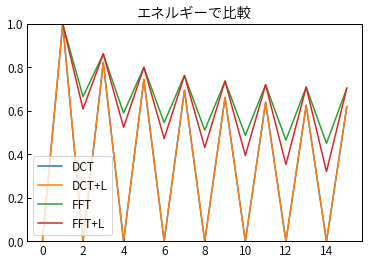

In [37]:
LENNA_F_DCT_power   = np.log10(LENNA_F_DCT)
LENNA_F_DCT_L_power = np.log10(LENNA_F_DCT_L)

LENNA_F_DCT_power[LENNA_F_DCT_power < 0.0000000001] = 0
LENNA_F_DCT_L_power[LENNA_F_DCT_L_power < 0.0000000001] = 0

LENNA_F_FFT_power   = np.log10(LENNA_F_FFT)
LENNA_F_FFT_L_power = np.log10(LENNA_F_FFT_L)

LENNA_F_DCT_power       /= LENNA_F_DCT_power.max()
LENNA_F_DCT_L_power     /= LENNA_F_DCT_L_power.max()
LENNA_F_FFT_power[:16]   /= LENNA_F_FFT_power[:16].max()
LENNA_F_FFT_L_power[:16] /= LENNA_F_FFT_L_power[:16].max()

plt.plot(LENNA_F_DCT_power      ,label="DCT")
plt.plot(LENNA_F_DCT_L_power    ,label="DCT+L")
plt.plot(LENNA_F_FFT_power[:16]  ,label="FFT")
plt.plot(LENNA_F_FFT_L_power[:16],label="FFT+L")
plt.ylim(0,1)
plt.title("エネルギーで比較")
plt.legend()

# 偶接続してFFTとDCTって同じ？

In [24]:
N = 9
dct = DCT(N)
LOOP_COUNT = 10000
LENNA_F_DCT   = np.zeros(N)
LENNA_F_DCT_L = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = LENNA.get_points(N)
    data_L = Lanczos(data)
    
#     LENNA_F_DCT   += abs(dct.dct(data))
#     LENNA_F_DCT_L += abs(dct.dct(data_L))
    LENNA_F_DCT   += abs(scipy.fftpack.dct(data,type=1))
    LENNA_F_DCT_L += abs(scipy.fftpack.dct(data_L,type=1))
    
LENNA_F_DCT   /= LOOP_COUNT
LENNA_F_DCT_L /= LOOP_COUNT

In [25]:
N = 16
LOOP_COUNT = 10000
LENNA_F_FFT   = np.zeros(N)
LENNA_F_FFT_L = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = LENNA.get_points(N//2)
    data_L = Lanczos(data)
    
    data_even = get_data_even_connect(data)
    data_L_even = get_data_even_connect(data_L)
    
    LENNA_F_FFT   += abs(np.fft.fft(data_even))
    LENNA_F_FFT_L += abs(np.fft.fft(data_L_even))
    
LENNA_F_FFT   /= LOOP_COUNT
LENNA_F_FFT_L /= LOOP_COUNT

/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


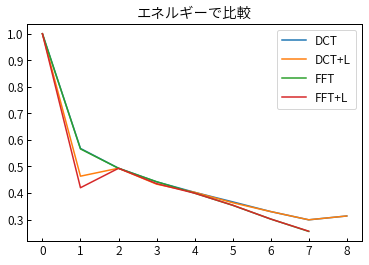

In [26]:
LENNA_F_DCT_power   = np.log10(LENNA_F_DCT)
LENNA_F_DCT_L_power = np.log10(LENNA_F_DCT_L)
LENNA_F_FFT_power   = np.log10(LENNA_F_FFT)
LENNA_F_FFT_L_power = np.log10(LENNA_F_FFT_L)

LENNA_F_DCT_power       /= LENNA_F_DCT_power.max()
LENNA_F_DCT_L_power     /= LENNA_F_DCT_L_power.max()
LENNA_F_FFT_power[:8]   /= LENNA_F_FFT_power[:8].max()
LENNA_F_FFT_L_power[:8] /= LENNA_F_FFT_L_power[:8].max()

plt.plot(LENNA_F_DCT_power      ,label="DCT")
plt.plot(LENNA_F_DCT_L_power    ,label="DCT+L")
plt.plot(LENNA_F_FFT_power[:8]  ,label="FFT")
plt.plot(LENNA_F_FFT_L_power[:8],label="FFT+L")
plt.title("エネルギーで比較")
plt.legend()

似たような形だけど、違う？
DCT Type1なら同じはず...！

In [29]:
LENNA_F_DCT_power

array([1.        , 0.56781505, 0.49334794, 0.44213499, 0.40248137,
       0.3666155 , 0.32994968, 0.29885022, 0.31334978])

In [30]:
LENNA_F_FFT_power

array([1.        , 0.5659683 , 0.49296675, 0.44246636, 0.39930012,
       0.35369857, 0.30183554, 0.25516011,       -inf, 0.84076782,
       0.99456616, 1.16545794, 1.31571776, 1.45795312, 1.62435492,
       1.86489939])

ちょっと違うのはエイリアシング？

# コサイン波でやったら？

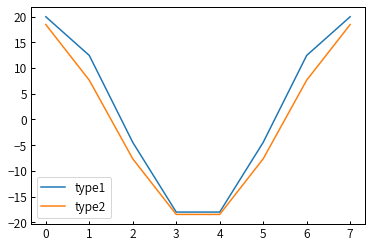

In [66]:
dct = DCT(8)
c = np.array([0,0,10,0,0,0,0,0])
data1 = scipy.fftpack.idct(c,type=1)
data2 = scipy.fftpack.idct(c,type=2)
plt.plot(data1,label="type1")
plt.plot(data2,label="type2")
plt.legend()

type1とtype2で復元できるcosが違う...。
おそらく、1/2がここにあらわれてるんやろな

/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


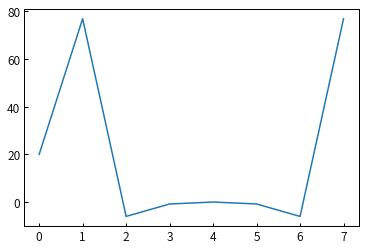

In [67]:
# data_even = get_data_even_connect(data)
F_FFT = np.fft.fft(data1)
plt.plot(F_FFT)

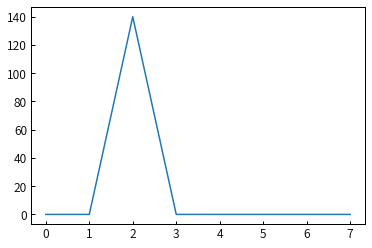

In [73]:
F_DCT = scipy.fftpack.dct(data1,type=1)
plt.plot(F_DCT)

# よくわからんし、cosからやる(よくわからんかった)

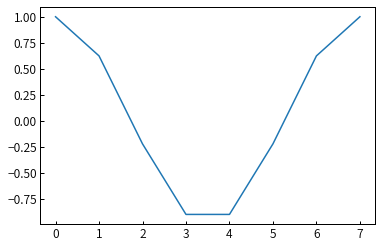

In [75]:
data = np.zeros(8)
for i in range(8):
    data[i] = np.cos(2*np.pi*i/7)
    
plt.plot(data)

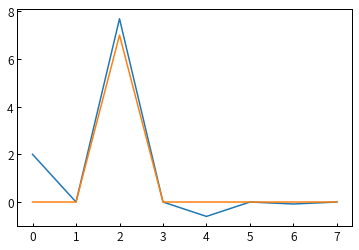

In [80]:
F_FFT = np.fft.fft(get_data_even_connect(data))
plt.plot(F_FFT[:8])
F_DCT = scipy.fftpack.dct(data,type=1)
plt.plot(F_DCT)

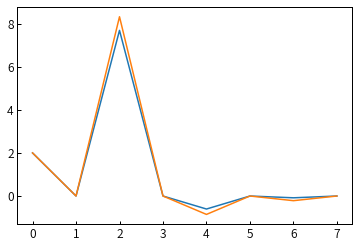

In [82]:
F_FFT = np.fft.fft(get_data_even_connect(data))
plt.plot(F_FFT[:8])
F_DCT = scipy.fftpack.dct(data,type=2)
plt.plot(F_DCT)

/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


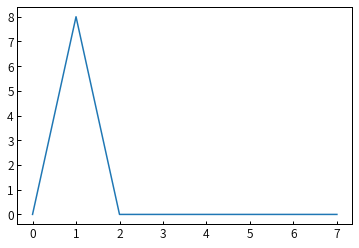

In [87]:
F_FFT = np.fft.fft(np.exp(2j * np.pi * np.arange(8) / 8))
plt.plot(F_FFT)

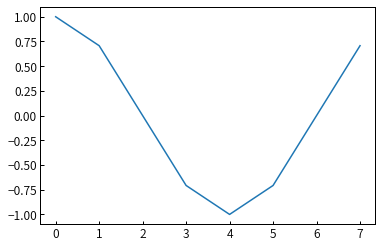

In [105]:
plt.plot(np.exp(2j * np.pi * np.arange(8) / 8))

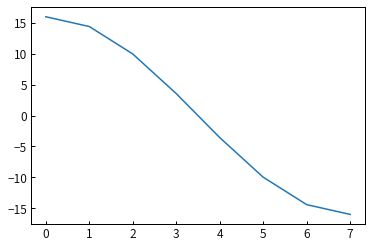

In [93]:
F_DCT = scipy.fftpack.dct(np.fft.fft(np.exp(2j * np.pi * np.arange(8) / 8)),type=1)
plt.plot(F_DCT)

# TYPE1とTYPE2の違い

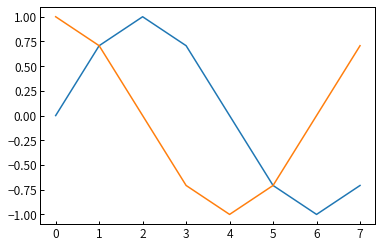

In [175]:
data = np.zeros(8)
for i in range(8):
    data[i] = np.sin(2*np.pi*i/8)
    
plt.plot(data)
plt.plot(np.exp(2j * np.pi * np.arange(8) / 8).real)

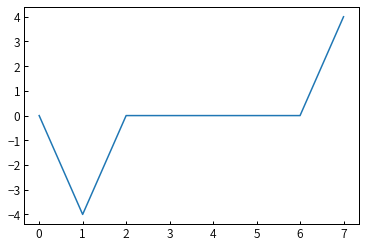

In [179]:
F_FFT = np.fft.fft(data)
plt.plot(F_FFT.imag)

cos(x)が検出

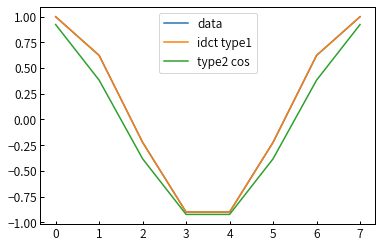

In [164]:
data = np.zeros(8)
for i in range(8):
    data[i] = np.cos(2*np.pi*i/7)
    
plt.plot(data,label="data")
plt.plot(scipy.fftpack.idct(np.array([0,0,0.5,0,0,0,0,0]),type=1),label="idct type1")
# DCT TYPE2
plt.plot(np.cos(2*np.pi*(np.arange(8)/8 + 0.5/8)),label="type2 cos")
plt.legend()

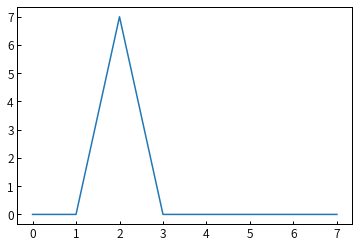

In [154]:
F_DCT = scipy.fftpack.dct(data,type=1)
plt.plot(F_DCT)

# TYPE2

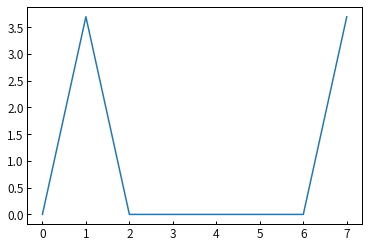

In [155]:
data = np.cos(2*np.pi*(np.arange(8)/8 + 0.5/8))
# type1のcosだと
# data = scipy.fftpack.idct(np.array([0,0,0.5,0,0,0,0,0]),type=1)
F_FFT = np.fft.fft(data)
plt.plot(F_FFT.real)
# plt.plot(F_FFT.imag)

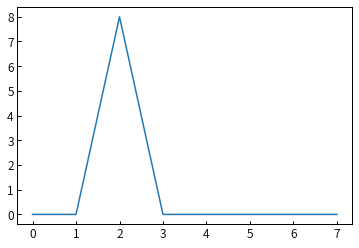

In [156]:
F_DCT = scipy.fftpack.dct(data,type=2)
plt.plot(F_DCT)

# Githubで見つけたやつ

https://gist.github.com/endolith/6322721

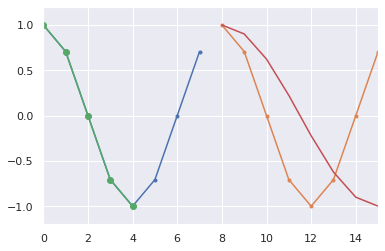

In [17]:
N = 8 # only even numbers
k = np.arange(N)

###################################### Type 1
plt.figure(1)

sig = np.cos(2*np.pi*k/N)
plt.plot(k,   sig, '.-')
plt.plot(k+N, sig, '.-')

spectrum = np.zeros(N//2+1)
# spectrum = np.zeros(N)
spectrum[1] = 1

plt.plot(k[:N//2+1], idct(spectrum, 1)/2, 'o-')
# plt.plot(idct(spectrum, 1)/2, 'o-')

data = np.cos(0.5*2*np.pi*np.arange(8)/7)
plt.plot(k+N, data)

plt.margins(0, 0.1)

np.testing.assert_allclose(sig[:N//2+1], idct(spectrum, 1)/2, rtol=1e-05, atol=1e-08)